<a href="https://colab.research.google.com/github/manushaurya/padhaibyonefourthlabs/blob/master/0403_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

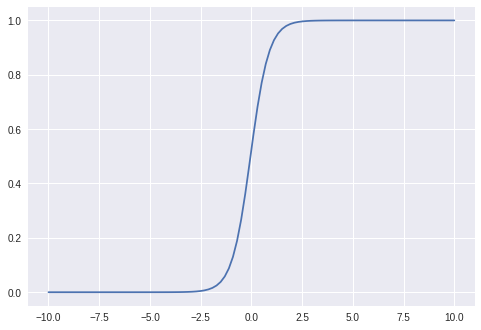

In [73]:
w=2.2 #@param {type: "slider", min: -3, max: 3,step:0.1}
b=0.1
X=np.linspace(-10,10,100) #100 points equally spaced between -10 and 10
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

#More Features(More Dimensions)

$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(x_1w_1+x_2w_2+b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

3D Plot reference https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1,XX2 = np.meshgrid(X1,X2)
w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])#0 : Red ; 1 : Green

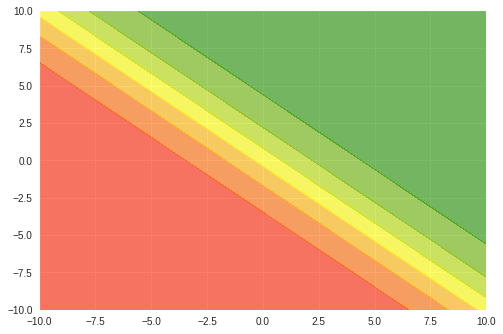

In [98]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)#black =1 white=0
plt.show()

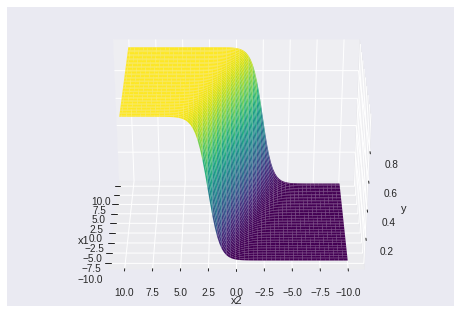

In [78]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis') #cmap='binary'#contour3D() can also be used instead of plot_surface()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 180) #we can use the view_init method to set the elevation and azimuthal angles. 
#fig

In above graph x2  greatly influences y than x1, because of the weight assigned to them.

#Compute Loss for given dataset

In [0]:
w_unknown = 0.5
b_unknown  = 0.25
X = np.random.random(25)*20-10 #Range [-10,10]
Y = sigmoid(X,w_unknown,b_unknown)

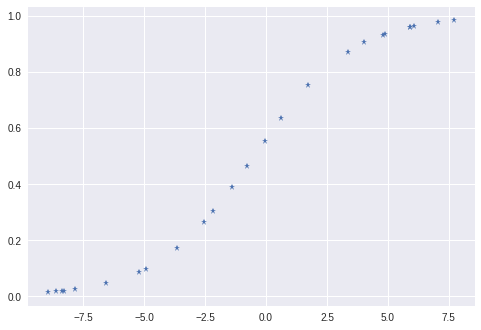

In [80]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_estim,b_estim):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x,w_estim,b_estim))**2
  return loss

In [0]:
W = np.linspace(0,2,100)
B = np.linspace(-1,1,100)

In [0]:
WW, BB = np.meshgrid(W,B)

In [0]:
Loss = np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i][j] = calculate_loss(X,Y,WW[i][j],BB[i][j])
    

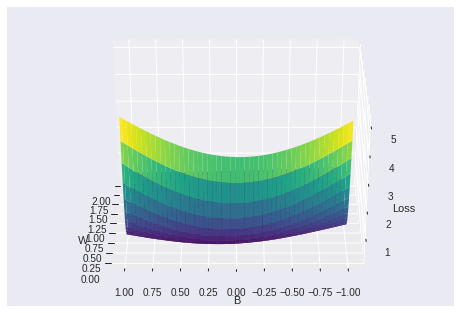

In [86]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis') 
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('Loss')

ax.view_init(30, 180)

In [87]:
ij = np.argmin(Loss)#coordinate of the number minimum in this list
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i*Loss.shape[1])
print(i,j)

62 25


In [88]:
print(WW[i][j],BB[i][j]) #matches with w_estim and b_estim

0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron :
  def __init__(self):
    self.w = None
    self.b = None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def gradient_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def gradient_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,epochs=1,lr=1,initialise=True):#lr is learning rate
    if initialise:
      self.w = np.random.randn(1,X.shape[1])#w is a vector of columns same as X
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.gradient_w(x,y)
        db += self.gradient_b(x,y)  
      self.w -= lr*dw
      self.b -= lr*db 
      

#Fit for Sample Data

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[3,1.25],[2,4],[1,5]])
Y = [1,1,1,0,0,0]


In [0]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [0]:
def plot_sig(X,Y,sn):
  #to be continued

In [120]:
for i in range(20):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.15,False) #parameters will not be reinitialised

[[ 0.1478631 -0.5467863]] [0.42262743]
[[ 0.14775487 -0.54682096]] [0.42299171]
[[ 0.14764677 -0.54685558]] [0.42335557]
[[ 0.1475388  -0.54689018]] [0.42371902]
[[ 0.14743096 -0.54692474]] [0.42408206]
[[ 0.14732324 -0.54695928]] [0.42444468]
[[ 0.14721565 -0.54699377]] [0.42480689]
[[ 0.14710819 -0.54702824]] [0.42516869]
[[ 0.14700085 -0.54706268]] [0.42553008]
[[ 0.14689364 -0.54709708]] [0.42589106]
[[ 0.14678656 -0.54713145]] [0.42625163]
[[ 0.1466796  -0.54716579]] [0.4266118]
[[ 0.14657277 -0.5472001 ]] [0.42697155]
[[ 0.14646606 -0.54723438]] [0.4273309]
[[ 0.14635947 -0.54726862]] [0.42768984]
[[ 0.14625301 -0.54730283]] [0.42804838]
[[ 0.14614668 -0.54733701]] [0.42840651]
[[ 0.14604047 -0.54737116]] [0.42876424]
[[ 0.14593438 -0.54740528]] [0.42912156]
[[ 0.14582842 -0.54743936]] [0.42947848]
